<a href="https://colab.research.google.com/github/abraromar002/Breast-Cancer-Classification-System-with-Neural-Network/blob/main/Breast_Cancer_Classification_By_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classification System with Neural **

**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import sklearn.datasets
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**PREPROCESSIND DATA**

In [ ]:
breast_cancer=pd.read_csv('/content/breast_cancer.csv')

In [ ]:
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
breast_cancer.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
breast_cancer.shape

(569, 31)

In [ ]:
breast_cancer['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
breast_cancer.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
# Label is target
X = breast_cancer.drop(columns='label', axis=1)
Y = breast_cancer['label']

**Split the data into training data & Testing **

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


**scaler the data**

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

**Building the NN Model**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8234 - loss: 0.5314 - val_accuracy: 0.8913 - val_loss: 0.3626
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9204 - loss: 0.2810 - val_accuracy: 0.8913 - val_loss: 0.2540
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9552 - loss: 0.1578 - val_accuracy: 0.8913 - val_loss: 0.2041
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9576 - loss: 0.1260 - val_accuracy: 0.9348 - val_loss: 0.1706
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9844 - loss: 0.0770 - val_accuracy: 0.9565 - val_loss: 0.1431
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9738 - loss: 0.0886 - val_accuracy: 0.9565 - val_loss: 0.1217
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9876 - loss: 0.0579 - val_accuracy: 0.9783 - val_loss: 0.1071
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9765 - loss: 0.0639 - val_accuracy: 0.9783 - val_loss

In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,392 (48.41 KB)

 Trainable params: 4,130 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,262 (32.28 KB)

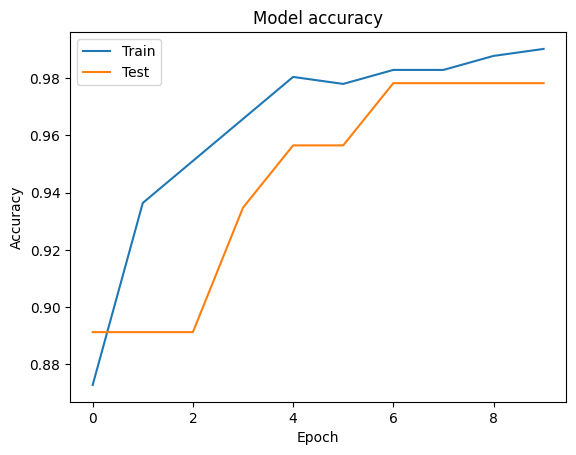

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

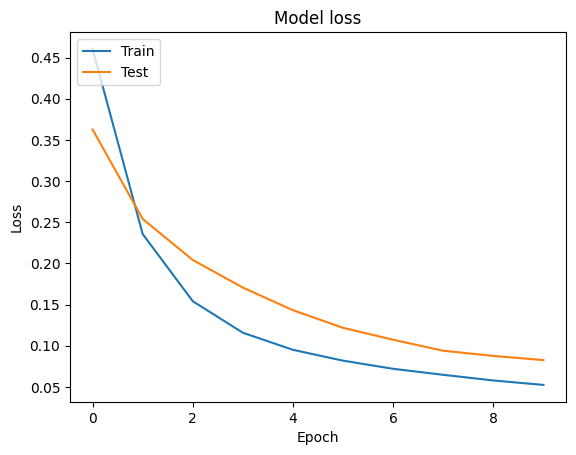

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**accuracy and evaluate model**

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.1134 
0.9561403393745422


In [ ]:
Y_pred = model.predict(X_test_std)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
print(Y_pred)

[[9.9998301e-01 1.6900029e-05]
 [5.9221475e-05 9.9994069e-01]
 [9.8664409e-01 1.3355915e-02]
 [7.2052288e-01 2.7947712e-01]
 [9.9999827e-01 1.6149520e-06]
 [3.9122696e-03 9.9608773e-01]
 [8.3205690e-05 9.9991673e-01]
 [9.9984884e-01 1.5109638e-04]
 [9.9900895e-01 9.9092117e-04]
 [9.9999994e-01 3.6448792e-08]
 [5.8149458e-03 9.9418503e-01]
 [9.9164265e-01 8.3574625e-03]
 [4.4359124e-04 9.9955636e-01]
 [9.9899602e-01 1.0039974e-03]
 [9.8732620e-01 1.2673772e-02]
 [2.2036904e-01 7.7963084e-01]
 [7.2914052e-01 2.7085945e-01]
 [1.5988961e-01 8.4011042e-01]
 [1.3241370e-04 9.9986768e-01]
 [9.7082658e-03 9.9029171e-01]
 [9.9040824e-01 9.5918430e-03]
 [8.8818842e-01 1.1181151e-01]
 [3.1649455e-04 9.9968350e-01]
 [4.5545045e-03 9.9544543e-01]
 [1.8611528e-02 9.8138833e-01]
 [7.9286456e-02 9.2071354e-01]
 [9.9999100e-01 8.9979785e-06]
 [7.7410704e-03 9.9225891e-01]
 [3.7181671e-03 9.9628180e-01]
 [1.3998961e-03 9.9860001e-01]
 [1.1745271e-02 9.8825485e-01]
 [1.3247052e-04 9.9986768e-01]
 [2.5448

**Model prediction**

In [ ]:
predictions = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
print(predictions)

[[9.9998301e-01 1.6900029e-05]
 [5.9221475e-05 9.9994069e-01]
 [9.8664409e-01 1.3355915e-02]
 [7.2052288e-01 2.7947712e-01]
 [9.9999827e-01 1.6149520e-06]
 [3.9122696e-03 9.9608773e-01]
 [8.3205690e-05 9.9991673e-01]
 [9.9984884e-01 1.5109638e-04]
 [9.9900895e-01 9.9092117e-04]
 [9.9999994e-01 3.6448792e-08]
 [5.8149458e-03 9.9418503e-01]
 [9.9164265e-01 8.3574625e-03]
 [4.4359124e-04 9.9955636e-01]
 [9.9899602e-01 1.0039974e-03]
 [9.8732620e-01 1.2673772e-02]
 [2.2036904e-01 7.7963084e-01]
 [7.2914052e-01 2.7085945e-01]
 [1.5988961e-01 8.4011042e-01]
 [1.3241370e-04 9.9986768e-01]
 [9.7082658e-03 9.9029171e-01]
 [9.9040824e-01 9.5918430e-03]
 [8.8818842e-01 1.1181151e-01]
 [3.1649455e-04 9.9968350e-01]
 [4.5545045e-03 9.9544543e-01]
 [1.8611528e-02 9.8138833e-01]
 [7.9286456e-02 9.2071354e-01]
 [9.9999100e-01 8.9979785e-06]
 [7.7410704e-03 9.9225891e-01]
 [3.7181671e-03 9.9628180e-01]
 [1.3998961e-03 9.9860001e-01]
 [1.1745271e-02 9.8825485e-01]
 [1.3247052e-04 9.9986768e-01]
 [2.5448

In [ ]:
predicted_classes = (predictions > 0.5).astype("int32")
print(predicted_classes)

[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]]


In [ ]:
for i, pred in enumerate(predicted_classes):
    if pred[0] == 0:
        print(f"Sample {i}: Benign")
    else:
        print(f"Sample {i}: Malignant")


Sample 0: Malignant
Sample 1: Benign
Sample 2: Malignant
Sample 3: Malignant
Sample 4: Malignant
Sample 5: Benign
Sample 6: Benign
Sample 7: Malignant
Sample 8: Malignant
Sample 9: Malignant
Sample 10: Benign
Sample 11: Malignant
Sample 12: Benign
Sample 13: Malignant
Sample 14: Malignant
Sample 15: Benign
Sample 16: Malignant
Sample 17: Benign
Sample 18: Benign
Sample 19: Benign
Sample 20: Malignant
Sample 21: Malignant
Sample 22: Benign
Sample 23: Benign
Sample 24: Benign
Sample 25: Benign
Sample 26: Malignant
Sample 27: Benign
Sample 28: Benign
Sample 29: Benign
Sample 30: Benign
Sample 31: Benign
Sample 32: Benign
Sample 33: Benign
Sample 34: Malignant
Sample 35: Benign
Sample 36: Benign
Sample 37: Benign
Sample 38: Benign
Sample 39: Malignant
Sample 40: Benign
Sample 41: Benign
Sample 42: Benign
Sample 43: Malignant
Sample 44: Malignant
Sample 45: Benign
Sample 46: Benign
Sample 47: Benign
Sample 48: Benign
Sample 49: Malignant
Sample 50: Benign
Sample 51: Benign
Sample 52: Benign

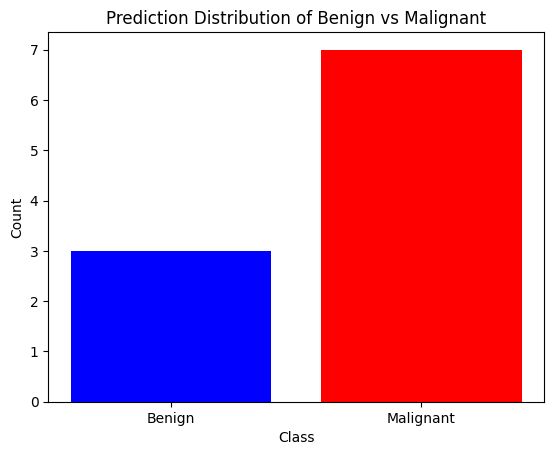

In [ ]:
predicted_classes = ['Malignant', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant', ...]

benign_count = predicted_classes.count('Benign')
malignant_count = predicted_classes.count('Malignant')

labels = ['Benign', 'Malignant']
counts = [benign_count, malignant_count]

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Prediction Distribution of Benign vs Malignant')
plt.show()

In [ ]:
#“Breast-Cancer-Classification-System-with-Neural-Network”

In [366]:
!apt-get install git



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
